In [ ]:
cube_off = """OFF
8 12 0
-1 -1 -1
 1 -1 -1
 1  1 -1
-1  1 -1
-1 -1  1
 1 -1  1
 1  1  1
-1  1  1
3 0 1 2
3 0 2 3
3 4 6 5
3 4 7 6
3 0 5 1
3 0 4 5
3 3 2 6
3 3 6 7
3 0 3 7
3 0 7 4
3 1 5 6
3 1 6 2
"""
with open("cube.off", "w") as f:
    f.write(cube_off)


In [ ]:
len([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,])

In [ ]:
ds.y

In [ ]:
help(ds)

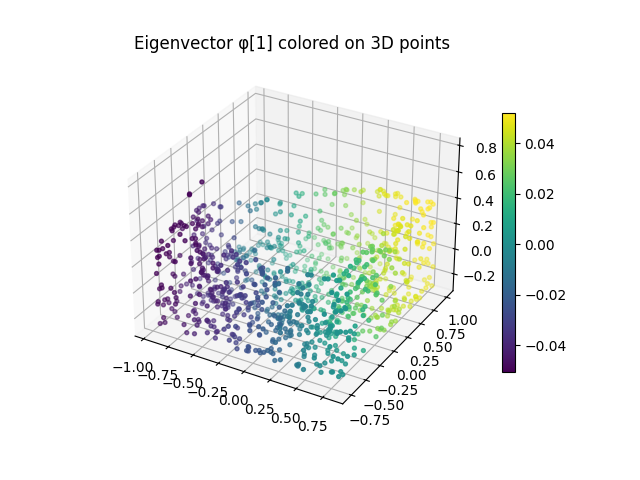

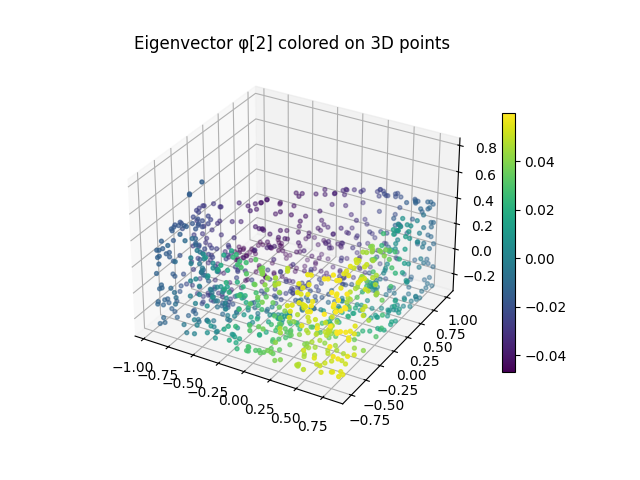

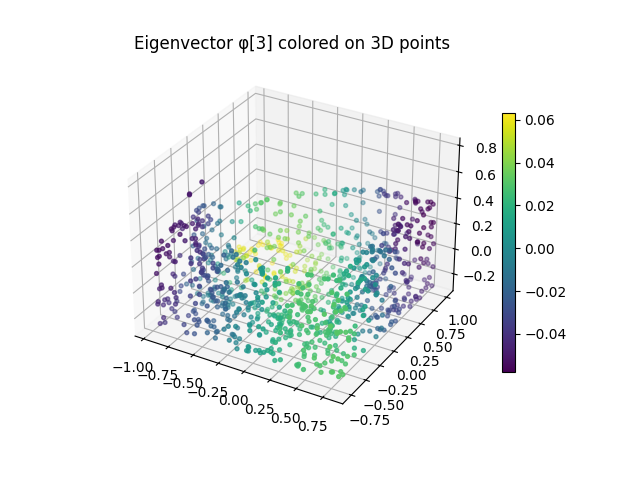

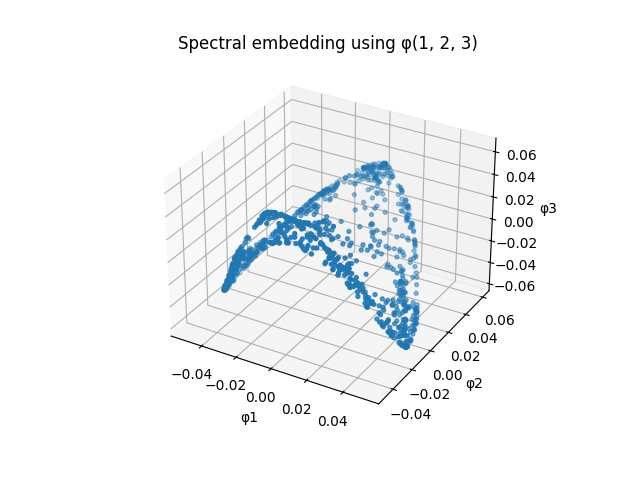

In [53]:
%matplotlib widget
from torch_geometric.datasets import ModelNet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from umc_ablation import *
from torch_geometric.transforms import Compose, SamplePoints, NormalizeScale, KNNGraph, ToUndirected

def plot_spectral_embedding(data, dims=(1,2,3), title=None, s=8):
    emb = data.phi[:, list(dims)].detach().cpu().numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=s)
    ax.set_title(title or f"Spectral embedding using φ{dims}")
    ax.set_xlabel(f"φ{dims[0]}")
    ax.set_ylabel(f"φ{dims[1]}")
    ax.set_zlabel(f"φ{dims[2]}")
    plt.show()

transform = Compose([
    SamplePoints(1024),
    NormalizeScale(),
    KNNGraph(k=20),  # consider force_undirected=True (see note below)
    ToUndirected(),
    ComputeSpectralConfig(K=128, use_umc=True),
])

def plot_eigenvector_on_points(data, k=1, title=None, s=8):
    # data.pos: [N,3], data.phi: [N,K]
    pts = data.pos.detach().cpu().numpy()
    v = data.phi[:, k].detach().cpu().numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=v, s=s)
    fig.colorbar(sc, ax=ax, shrink=0.7)
    ax.set_title(title or f"Eigenvector φ[{k}] colored on 3D points")
    plt.show()


ds = ModelNet('../data/ModelNet_Robustness', '10', train=False, transform=transform)
data = ds[0]  # transform runs here and creates data.phi

for k in range(1,4):
    plot_eigenvector_on_points(data, k=k)
plot_spectral_embedding(data, dims=(1,2,3))


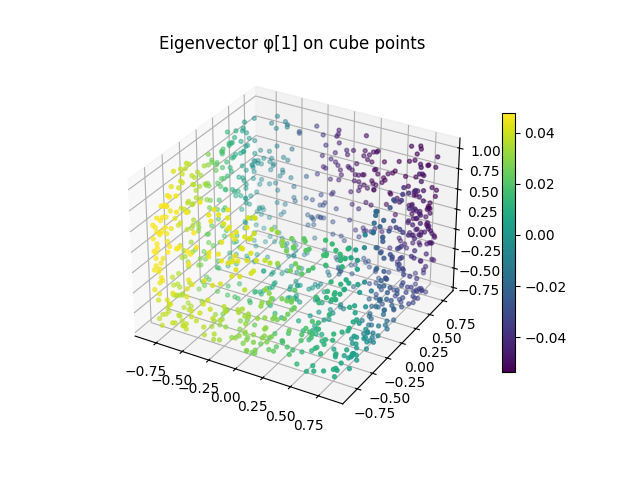

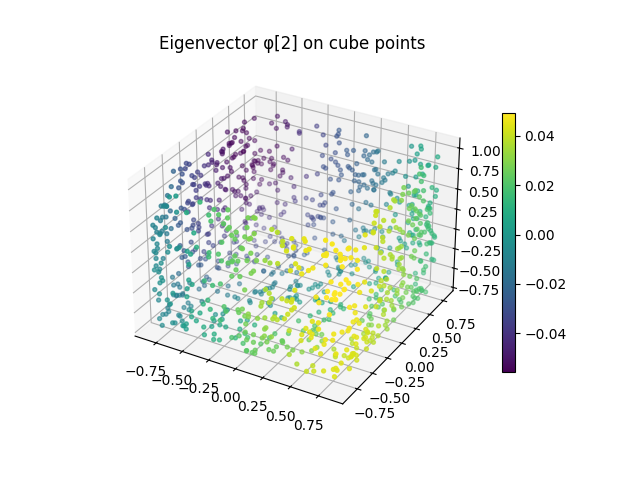

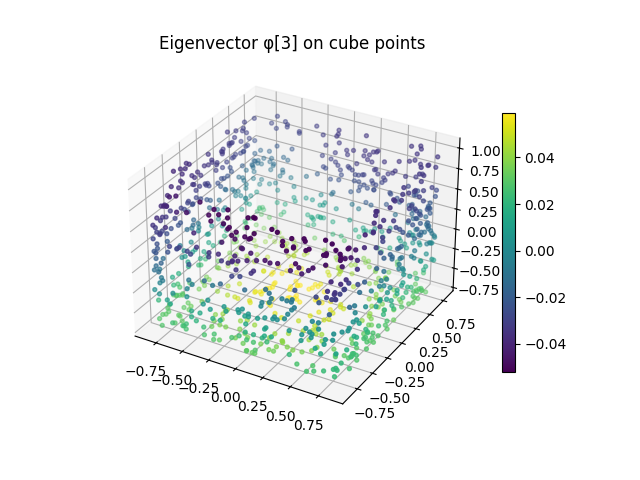

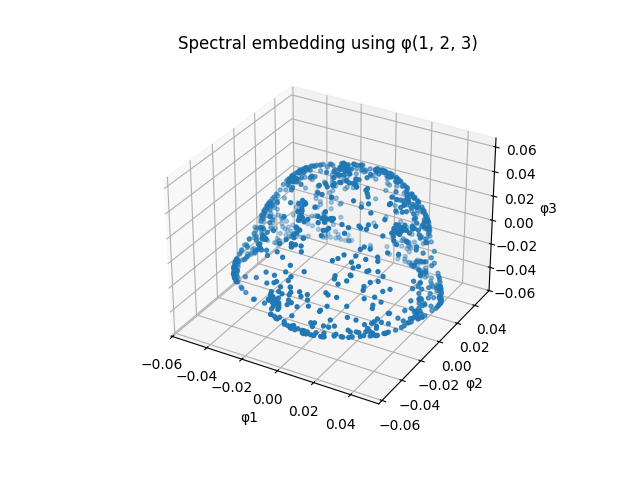

In [52]:
%matplotlib widget
import torch
import matplotlib.pyplot as plt
from torch_geometric.io import read_off
from torch_geometric.transforms import Compose, SamplePoints, NormalizeScale, KNNGraph, ToUndirected
from torch_geometric.utils import to_undirected

from umc_ablation import ComputeSpectralConfig  # your class

# Your plotting functions (reuse yours)
def plot_eigenvector_on_points(data, k=1, title=None, s=8):
    pts = data.pos.detach().cpu().numpy()
    v = data.phi[:, k].detach().cpu().numpy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=v, s=s)
    fig.colorbar(sc, ax=ax, shrink=0.7)
    ax.set_title(title or f"Eigenvector φ[{k}] on cube points")
    plt.show()

def plot_spectral_embedding(data, dims=(1,2,3), title=None, s=8):
    emb = data.phi[:, list(dims)].detach().cpu().numpy()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=s)
    ax.set_title(title or f"Spectral embedding using φ{dims}")
    ax.set_xlabel(f"φ{dims[0]}")
    ax.set_ylabel(f"φ{dims[1]}")
    ax.set_zlabel(f"φ{dims[2]}")
    plt.show()

# Load cube mesh
data = read_off("cube_toilet.off")

# Some versions return face as [F, 3]; SamplePoints expects [3, F]
if hasattr(data, "face") and data.face is not None and data.face.dim() == 2 and data.face.size(0) != 3:
    data.face = data.face.t().contiguous()

# Make transform (same idea as your ModelNet pipeline)
transform = Compose([
    SamplePoints(1024),
    NormalizeScale(),
    KNNGraph(k=20),
    ToUndirected(),
    ComputeSpectralConfig(K=128, use_umc=False),
])

# Apply transform
torch.manual_seed(0)  # optional reproducibility for sampling
data = transform(data)

# (Optional) force undirected graph for more interpretable modes
data.edge_index = to_undirected(data.edge_index, num_nodes=data.num_nodes)

# Visualize
for k in range(1, 4):
    plot_eigenvector_on_points(data, k=k)
plot_spectral_embedding(data, dims=(1,2,3))


In [1]:
import math
import torch


def _uniform_sphere(n: int, device: str):
    """Draw n points uniformly on the unit sphere."""
    x = torch.randn(n, 3, device=device)
    return x / (x.norm(dim=1, keepdim=True) + 1e-12)


def _points_near(focus: torch.Tensor, n: int, sigma: float, device: str):
    """Legacy helper – kept for backward compatibility."""
    focus = focus / (focus.norm() + 1e-12)               # (3,)
    r = torch.randn(n, 3, device=device)

    # Project random directions onto tangent plane at focus
    proj = (r @ focus).unsqueeze(1) * focus.unsqueeze(0)
    t = r - proj
    t = t / (t.norm(dim=1, keepdim=True) + 1e-12)

    # Small tangent perturbation, then renormalize back to sphere
    p = focus.unsqueeze(0) + sigma * t
    return p / (p.norm(dim=1, keepdim=True) + 1e-12)


def _uniform_hemisphere(focus: torch.Tensor, n: int, device: str):
    """
    Sample n points uniformly on the hemisphere whose pole is `focus`.
    Points exactly on the equator are kept (dot == 0).
    """
    focus = focus / (focus.norm() + 1e-12)               # ensure unit length
    points = []
    needed = n
    # Rejection sampling – generate a batch twice as large as needed,
    # keep those with a non‑negative dot product.
    while needed > 0:
        batch = _uniform_sphere(needed * 2, device=device)
        mask = (batch @ focus) >= 0
        selected = batch[mask]
        if selected.shape[0] > needed:
            selected = selected[:needed]
        points.append(selected)
        needed -= selected.shape[0]
    return torch.cat(points, dim=0)


def thomson_sphere_points(
    N: int = 1024,
    steps: int = 1200,
    lr: float = 0.02,
    irregular_sampling=None,          # e.g. (50, 30)
    cluster_sigma: float = 0.02,      # kept for API compatibility
    seed: int | None = None,
    device: str | None = None,
    return_focus: bool = False,
):
    """
    Generate N points on S² using a Thomson‑like relaxation.
    Optional `irregular_sampling` = (a, b) splits the final set:
      - a % of points are placed uniformly on the hemisphere that contains a
        randomly chosen focus point,
      - b % are placed uniformly on the opposite hemisphere,
      - the remaining points stay as the relaxed, roughly uniform set.

    a and b must be in [0, 100] and a + b ≤ 100.
    """
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    if seed is not None:
        torch.manual_seed(seed)
        if device.startswith("cuda"):
            torch.cuda.manual_seed_all(seed)

    # ------------------------------------------------------------
    # 1) Thomson‑like relaxation to obtain a fairly uniform base set
    # ------------------------------------------------------------
    x = _uniform_sphere(N, device=device)
    v = torch.zeros_like(x)

    momentum = 0.9
    eps = 1e-12

    for t in range(steps):
        diff = x[:, None, :] - x[None, :, :]                # [N,N,3]
        dist2 = (diff * diff).sum(dim=-1) + eps            # [N,N]
        dist2.fill_diagonal_(float("inf"))                 # ignore self‑force

        inv_dist3 = dist2.pow(-1.5)                         # [N,N]
        f = (diff * inv_dist3[..., None]).sum(dim=1)       # [N,3]

        # Tangent projection (stay on sphere)
        f = f - (f * x).sum(dim=1, keepdim=True) * x

        # Simple damped dynamics + mild annealing
        lr_t = lr * (0.999 ** t)
        v = momentum * v + lr_t * f
        x = x + v
        x = x / (x.norm(dim=1, keepdim=True) + 1e-12)

    focus = None

    # ------------------------------------------------------------
    # 2) Optional irregular sampling injection (after relaxation)
    # ------------------------------------------------------------
    if irregular_sampling is not None:
        a, b = irregular_sampling
        if not (0 <= a <= 100 and 0 <= b <= 100):
            raise ValueError("irregular_sampling percents must be in [0,100].")
        if a + b > 100:
            raise ValueError("irregular_sampling: a + b must be <= 100.")

        n_hemi1 = int(round(N * a / 100.0))
        n_hemi2 = int(round(N * b / 100.0))

        # pick a random focus point ON the sphere
        focus = x[torch.randint(0, N, (1,), device=device)].squeeze(0)

        perm = torch.randperm(N, device=device)
        idx_hemi1 = perm[:n_hemi1]
        idx_hemi2 = perm[n_hemi1:n_hemi1 + n_hemi2]

        if n_hemi1 > 0:
            x[idx_hemi1] = _uniform_hemisphere(focus, n_hemi1, device=device)

        if n_hemi2 > 0:
            # opposite hemisphere: use -focus as the pole
            x[idx_hemi2] = _uniform_hemisphere(-focus, n_hemi2, device=device)

    x = x.detach()
    if return_focus:
        return x, (focus.detach() if focus is not None else None)
    return x

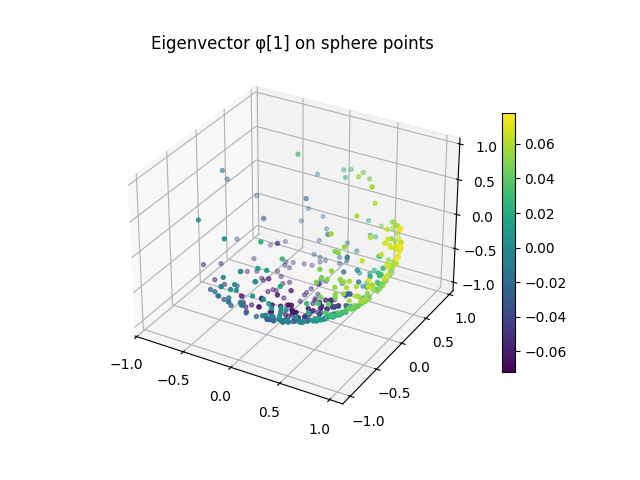

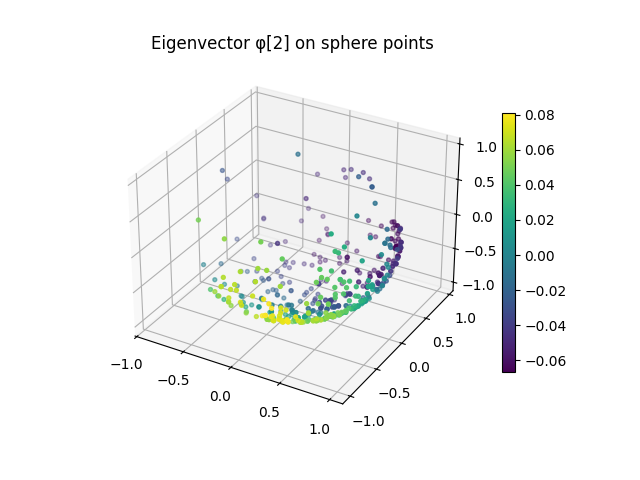

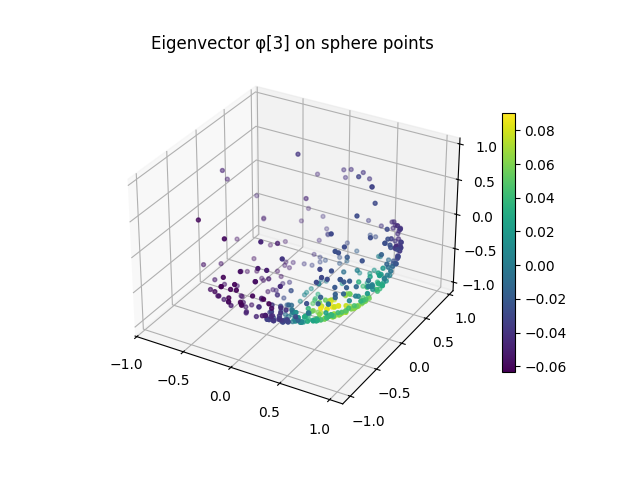

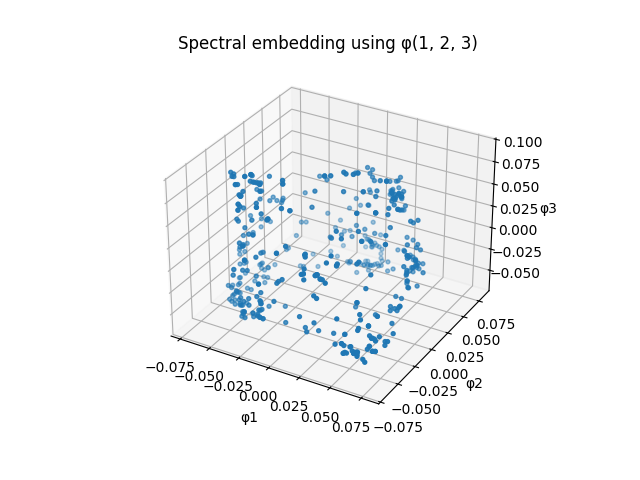

In [23]:
%matplotlib widget
import torch
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.transforms import Compose, KNNGraph, NormalizeScale
from torch_geometric.utils import to_undirected
from torch_geometric.transforms import BaseTransform
from umc_modelnet10_utils import IrregularResample
from umc_ablation import ComputeSpectralConfig

def plot_eigenvector_on_points(data, k=1, title=None, s=8):
    pts = data.pos.detach().cpu().numpy()
    v = data.phi[:, k].detach().cpu().numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=v, s=s)
    fig.colorbar(sc, ax=ax, shrink=0.7)
    ax.set_title(title or f"Eigenvector φ[{k}] on sphere points")
    plt.show()

def plot_spectral_embedding(data, dims=(1,2,3), title=None, s=8):
    emb = data.phi[:, list(dims)].detach().cpu().numpy()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(emb[:,0], emb[:,1], emb[:,2], s=s)
    ax.set_title(title or f"Spectral embedding using φ{dims}")
    ax.set_xlabel(f"φ{dims[0]}")
    ax.set_ylabel(f"φ{dims[1]}")
    ax.set_zlabel(f"φ{dims[2]}")
    plt.show()


# make KNN graph undirected before spectral computation
class MakeUndirected(BaseTransform):
    def forward(self, data):
        data.edge_index = to_undirected(data.edge_index, num_nodes=data.num_nodes)
        return data

pos, focus = thomson_sphere_points(
    N=2048,
    irregular_sampling=(50, 50),
    seed=0,
    return_focus=True,
)

pos = pos.cpu()

data = Data(pos=pos)

transform = Compose([
    NormalizeScale(),
    IrregularResample(num_points=512, bias_strength=3),
    KNNGraph(k=20),
    MakeUndirected(),
    ComputeSpectralConfig(K=32, use_umc=True),
])

data = transform(data)

# 4) visualize eigenvectors on the sphere
for k in range(1, 4):
    plot_eigenvector_on_points(data, k=k)

plot_spectral_embedding(data, dims=(1,2,3))


w stats: 0.9844204187393188 1.0000040531158447 1.011666178703308


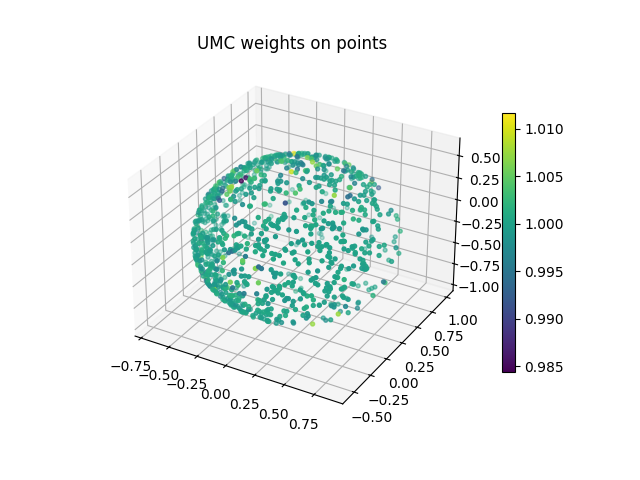

In [7]:
w = data.umc_weights
print("w stats:", w.min().item(), w.mean().item(), w.max().item())

# visualize weights on the sphere
pts = data.pos.cpu().numpy()
wc  = w.cpu().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=wc, s=8)
fig.colorbar(sc, ax=ax, shrink=0.7)
ax.set_title("UMC weights on points")
plt.show()


In [8]:
G_umc.shape

torch.Size([32, 32])

||Phi^T Phi - I||_F^2      : 1.0977490617902763e-11
||Phi^T W Phi - I||_F^2    : 1.458533116505123e-08


/tmp/ipykernel_3363953/1136323682.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


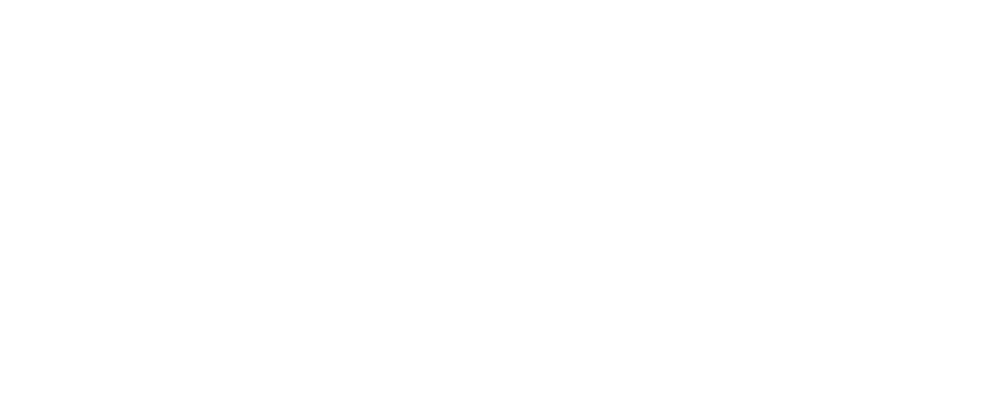

In [9]:
phi = data.phi
K = phi.size(1)
I = torch.eye(K)

G_naive = phi.T @ phi
err_naive = ((G_naive - I)**2).sum().item()

w = data.umc_weights
G_umc = phi.T @ (phi * w[:, None])
err_umc = ((G_umc - I)**2).sum().item()

print("||Phi^T Phi - I||_F^2      :", err_naive)
print("||Phi^T W Phi - I||_F^2    :", err_umc)

import torch
import matplotlib.pyplot as plt
import numpy as np

# Ensure CPU + numpy
G_naive_np = G_naive.detach().cpu().numpy()
G_umc_np   = G_umc.detach().cpu().numpy()

eps = 1e-8

# Log magnitude
log_naive = np.log10(np.abs(G_naive_np) + eps)
log_umc   = np.log10(np.abs(G_umc_np) + eps)

# Shared color scale (CRITICAL)
vmin = min(log_naive.min(), log_umc.min())
vmax = max(log_naive.max(), log_umc.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(log_naive, cmap="magma", vmin=vmin, vmax=vmax)
axes[0].set_title("Naive Gram Matrix (log₁₀ |G|)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("k")

im1 = axes[1].imshow(log_umc, cmap="magma", vmin=vmin, vmax=vmax)
axes[1].set_title("UMC Gram Matrix (log₁₀ |G|)")
axes[1].set_xlabel("k")

cbar = fig.colorbar(im1, ax=axes, fraction=0.046)
cbar.set_label("log₁₀(|Gᵢⱼ|)")

plt.tight_layout()
plt.show()

In [13]:
deg = degree(data.edge_index[0], data.num_nodes).cpu()
w = data.umc_weights.cpu()
print("corr(w, deg) =", torch.corrcoef(torch.stack([w, deg]))[0,1].item())


corr(w, deg) = -0.035603754222393036


In [10]:
w = data.umc_weights.cpu()
N = w.numel()
ess = (w.sum()**2) / (w.pow(2).sum() + 1e-12)
print("ESS:", ess.item(), "out of", N)
print("max/min:", (w.max()/w.min()).item())
print("mean:", w.mean().item())


ESS: 1023.99609375 out of 1024
max/min: 1.0276769399642944
mean: 1.0000040531158447


In [11]:
from torch_geometric.utils import degree
N = data.num_nodes
deg = degree(data.edge_index[0], N).to(data.phi.device)

w_deg = deg / deg.mean()  # now average weight is ~1

phi = data.phi
K = phi.size(1)
I = torch.eye(K, device=phi.device)

err_deg_norm = ((phi.T @ (phi * w_deg[:, None]) - I)**2).sum().item()
print("||Phi^T Wdeg Phi - I||_F^2:", err_deg_norm)


||Phi^T Wdeg Phi - I||_F^2: 0.06958766281604767


In [12]:
phi = data.phi
w1  = torch.ones(data.num_nodes, device=phi.device)
w2  = data.umc_weights.to(phi.device)

f = data.pos[:, 2].to(phi.device)  # z-coordinate as a simple signal

def recon_error(w):
    coeff = phi.T @ (f * w)
    f_rec = phi @ coeff
    return ((f - f_rec)**2).mean().item()

print("Recon MSE (uniform weights):", recon_error(w1))
print("Recon MSE (UMC weights):    ", recon_error(w2))


Recon MSE (uniform weights): 0.0009960740571841598
Recon MSE (UMC weights):     0.0009960741735994816
